In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime
import math
from tqdm.notebook import tqdm

In [2]:
#load datasets
am_df = pd.read_csv("data/american_stock.csv")
eu_df = pd.read_csv("data/european_index.csv")
rf_df = pd.read_csv("data/FEDFUNDS.csv")
# stock_price_df = pd.read_csv("data/stock_prices.csv")
stock_price_df = pd.read_csv("data/ndx_historical.csv")

In [3]:
rf_df["DATE"] = pd.to_datetime(rf_df["DATE"], format="%Y-%m-%d")
rf_df.head()

,DATE,FEDFUNDS
0,2013-02-01,0.15
1,2013-03-01,0.14
2,2013-04-01,0.15
3,2013-05-01,0.11
4,2013-06-01,0.09


In [16]:
# How many intervals to look back for when calculating volatility
volatility_intervals = 100

stock_price_df["Date"] = pd.to_datetime(stock_price_df["Date"])
stock_price_df["volatility"] = stock_price_df["Close/Last"].rolling(volatility_intervals).std() / stock_price_df["Close/Last"]
stock_price_df = stock_price_df.dropna()
stock_price_df

/var/folders/77/q3gt76rs7s9dtwfn9frfxdfm0000gn/T/ipykernel_81064/3950138836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_price_df["Date"] = pd.to_datetime(stock_price_df["Date"])
/var/folders/77/q3gt76rs7s9dtwfn9frfxdfm0000gn/T/ipykernel_81064/3950138836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_price_df["volatility"] = stock_price_df["Close/Last"].rolling(volatility_intervals).std() / stock_price_df["Close/Last"]


,Date,Close/Last,Volume,Open,High,Low,std,volatility
297,2022-01-18,15210.76,--,15378.06,15446.30,15182.96,983.108630,0.064632
298,2022-01-14,15611.59,--,15396.47,15617.18,15396.47,989.834028,0.063404
299,2022-01-13,15495.62,--,15970.09,15990.38,15468.09,998.034123,0.064407
300,2022-01-12,15905.10,--,15955.48,16017.39,15815.95,1014.153507,0.063763
301,2022-01-11,15844.12,--,15582.72,15848.56,15496.91,1026.489529,0.064787
...,...,...,...,...,...,...,...,...
2537,2013-04-01,2797.07,--,2818.69,2821.48,2789.76,103.221858,0.036904
2538,2013-03-29,2818.69,--,0.00,0.00,0.00,103.643424,0.036770
2539,2013-03-28,2818.69,--,2809.98,2820.67,2804.53,103.973964,0.036887
2540,2013-03-27,2809.98,--,2806.50,2811.79,2783.86,103.602417,0.036869


In [18]:
am_df = am_df[["date", "symbol", "exdate", "cp_flag", "strike_price", "best_bid", "best_offer", "exercise_style"]]
am_df["date"] = pd.to_datetime(am_df["date"], format="%Y%m%d")
am_df["exdate"] = pd.to_datetime(am_df["exdate"], format="%Y%m%d")
am_df["tte"] = am_df["exdate"] - am_df["date"]
am_df["rf_join_date"] = pd.to_datetime(am_df["date"].apply(lambda x: datetime.date(x.year, x.month, 1)))
am_df = pd.merge(am_df, rf_df, left_on="rf_join_date", right_on="DATE")
am_df = pd.merge(am_df, stock_price_df, left_on="date", right_on="Date")
am_df = am_df[["date", "symbol", "exdate", "cp_flag", "strike_price", "best_bid", "best_offer", "exercise_style", "tte", "Close/Last", "FEDFUNDS", "volatility"]]
am_df.head()

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style,tte,Close/Last,FEDFUNDS,std
0,2015-01-02,AAPL 150102C100000,2015-01-02,C,100000,9.20,9.35,A,0 days,4230.24,0.11,116.199936
1,2015-01-02,AAPL 150102C101000,2015-01-02,C,101000,8.20,8.40,A,0 days,4230.24,0.11,116.199936
2,2015-01-02,AAPL 150102C102000,2015-01-02,C,102000,7.25,7.35,A,0 days,4230.24,0.11,116.199936
3,2015-01-02,AAPL 150102C103000,2015-01-02,C,103000,6.20,6.40,A,0 days,4230.24,0.11,116.199936
4,2015-01-02,AAPL 150102C104000,2015-01-02,C,104000,5.25,5.35,A,0 days,4230.24,0.11,116.199936


,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style,tte,Close/Last,FEDFUNDS,volatility
0,2015-01-02,AAPL 150102C100000,2015-01-02,C,100000,9.20,9.35,A,0 days,4230.24,0.11,0.027469
1,2015-01-02,AAPL 150102C101000,2015-01-02,C,101000,8.20,8.40,A,0 days,4230.24,0.11,0.027469
2,2015-01-02,AAPL 150102C102000,2015-01-02,C,102000,7.25,7.35,A,0 days,4230.24,0.11,0.027469
3,2015-01-02,AAPL 150102C103000,2015-01-02,C,103000,6.20,6.40,A,0 days,4230.24,0.11,0.027469
4,2015-01-02,AAPL 150102C104000,2015-01-02,C,104000,5.25,5.35,A,0 days,4230.24,0.11,0.027469


In [19]:
eu_df = eu_df[["date", "symbol", "exdate", "cp_flag", "strike_price", "best_bid", "best_offer", "exercise_style"]]
eu_df["date"] = pd.to_datetime(eu_df["date"], format="%Y%m%d")
eu_df["exdate"] = pd.to_datetime(eu_df["exdate"], format="%Y%m%d")
eu_df["tte"] = eu_df["exdate"] - eu_df["date"]
eu_df["rf_join_date"] = pd.to_datetime(eu_df["date"].apply(lambda x: datetime.date(x.year, x.month, 1)))
eu_df = pd.merge(eu_df, rf_df, left_on="rf_join_date", right_on="DATE")
eu_df = pd.merge(eu_df, stock_price_df, left_on="date", right_on="Date")
eu_df = eu_df[["date", "symbol", "exdate", "cp_flag", "strike_price", "best_bid", "best_offer", "exercise_style", "tte", "Close/Last", "FEDFUNDS", "volatility"]]
eu_df.head()

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style,tte,Close/Last,FEDFUNDS,volatility
0,2015-01-02,NDX 150109C3100000,2015-01-09,C,3100000,1124.9,1134.0,E,7 days,4230.24,0.11,0.027469
1,2015-01-02,NDX 150109C3125000,2015-01-09,C,3125000,1099.9,1109.0,E,7 days,4230.24,0.11,0.027469
2,2015-01-02,NDX 150109C3150000,2015-01-09,C,3150000,1074.9,1084.0,E,7 days,4230.24,0.11,0.027469
3,2015-01-02,NDX 150109C3175000,2015-01-09,C,3175000,1049.9,1059.0,E,7 days,4230.24,0.11,0.027469
4,2015-01-02,NDX 150109C3200000,2015-01-09,C,3200000,1024.9,1034.0,E,7 days,4230.24,0.11,0.027469


In [29]:
# European Options Pricing Monte Carlo Simulation assuming log-normal distribution of stock, e.g. SPX.
# Larger the num_simulations, the more accurate the model becomes, at square root scale
# Default number is 1,000,000 simulations
def monte_carlo_european_option_pricing(init_price, strike, ttm, int_rate, volatility, type_of_option='call', num_simulations=1000000, plot=False, num_paths_to_plot=25):
    """
    Monte Carlo pricing model for European options with sample paths plotting.

    :param init_price: Initial stock price
    :param strike: Strike price
    :param ttm: Time to maturity (in years)
    :param int_rate: Risk-free interest rate
    :param volatility: Volatility of the underlying asset
    :param type_of_option: Type of option ('call' or 'put')
    :param num_simulations: Number of simulations for Monte Carlo
    :param num_paths_to_plot: Number of these random log-normal distribution paths to plot
    :return: The estimated price of the option
    """

    # Generate random numbers for the Monte Carlo simulation (decided to use normal distribution for this since it's clean)
    rand_nums = np.random.standard_normal(size=(num_simulations, int(ttm * 365)))

    # Calculate the stock price at maturity for each simulation
    # Used Geometric Brownian Motion assuming the stock has the log-normal property (Ch. 14.3-14.7)
    dt = ttm / rand_nums.shape[1]
    price_at_maturity = init_price * np.exp(np.cumsum((int_rate - 0.5 * volatility ** 2) * dt + volatility * math.sqrt(dt) * rand_nums, axis=1))

    if plot:
        # Plot sample stock price paths using matplotlib
        plt.figure(figsize=(10, 6))
        #Get time_step interval in even spacing for matplotlib
        time_steps = np.linspace(0, ttm, rand_nums.shape[1] + 1)
        #Select a random sample of our 2D generated GBM plots to plot
        selected_paths = np.random.choice(num_simulations, num_paths_to_plot, replace=False)
        for i in selected_paths:
            plt.plot(time_steps, np.concatenate(([init_price], price_at_maturity[i, :])))
        plt.hlines(strike, xmin=0, xmax=time_steps[-1], colors="red")
        plt.xlabel('Time (years)')
        plt.ylabel('Stock Price')
        plt.title('Sample Stock Price Paths')
        plt.grid(True)
        plt.show()

    # Determine the payoff for each simulation type (call or put), just a basic formula
    if type_of_option.lower() == 'call':
        payoff = np.maximum(price_at_maturity[:, -1] - strike, 0)
    elif type_of_option.lower() == 'put':
        payoff = np.maximum(strike - price_at_maturity[:, -1], 0)
    #This should never happen but if invariant happens to be violated our program will be fine
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    # Calculate the present value of the payoffs using interest rate using the formula
    present_value = np.exp(-int_rate * ttm) * payoff

    # Estimate the option price as the mean of the present values from all our simulations
    simulated_priced_option = np.mean(present_value)

    return simulated_priced_option

put


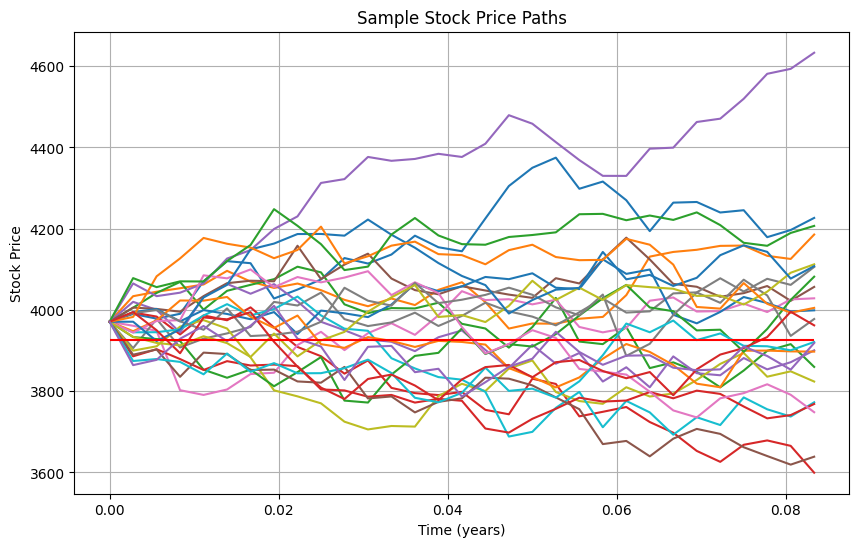

The estimated price of the European put for SPX put expiring in 1 month is $65.66


In [24]:
# Example usage with a random SPX options contract currently
S0 = 3970.99          # Initial stock price
K = 3925.00           # Strike price
T = (1/12)            # Time to maturity (in years)
r = 0.0338            # Risk-free interest rate
sigma = 0.2012        # Volatility of the underlying asset
option_type = 'put'

option_price = monte_carlo_european_option_pricing(S0, K, T, r, sigma, option_type, plot=True)
print(f"The estimated price of the European {option_type} for SPX put expiring in 1 month is ${option_price:.2f}")


In [25]:
# Least Squares Monte Carlo Algorithm For Pricing American Options, e.g. SPY/AAPL

def generate_random_paths(u_price, int_rate, volatility, ttm, time_step, n_paths):
    """
    Generates 2D random path using Geometric Brownian Motion (a stochastic process, read up here: bit.ly/3KaOTlk) to simulate random price paths
    :param u_price: Initial underlying price of asset at option contract creation
    :param int_rate: Risk free interest rate investor earns on any risk-free asset during same time as option
    :param volatility: Volatility, or degree of fluctuations over the time period
    :param ttm : Time until option maturity/expiration
    :param time_step: The fraction of a year used as a singular time step in the LSM Simulation
    :param n_paths: Number of simulated path prices/trajectories for our option
    :return: S, A 2-dimensional numpy array where the [cols] are paths and [rows] are time stamps
    """
    # Find number of steps for simulation based on ttm and time step
    n_steps = math.ceil(ttm/time_step)
    # Make random increments for our paths (2D array of normal increments with mean 0 and std deviation equal to sqrt of time_step
    # Dimensions of resulting random array: (N_steps, N_paths):
    random_increments = np.random.normal(0, np.sqrt(time_step), (n_steps, n_paths))
    # Sum up these random increments along the time step axis, which we mark as 0 for now
    sum_random_increments = np.cumsum(random_increments, axis=0)
    # Use Geometric Brownian Motion formula to calculate the final paths and time stamps
    return u_price * np.exp((int_rate - 0.5 * volatility ** 2) * np.linspace(time_step, ttm, n_steps)[:, np.newaxis] + volatility * sum_random_increments)

#TODO: Implement the American Model and iterate through all time steps to find which ones have positive intrinsic value
#TODO: Add matplotlib graphs & backtest against common American options like SPY and AAPL


date              2015-09-25 00:00:00
symbol             NDX 151002P4600000
exdate            2015-10-02 00:00:00
cp_flag                             P
strike_price                  4600000
best_bid                        366.6
best_offer                      380.5
exercise_style                      E
tte                   7 days 00:00:00
Close/Last                    4224.74
FEDFUNDS                         0.14
volatility                   0.054079
Name: 658767, dtype: object


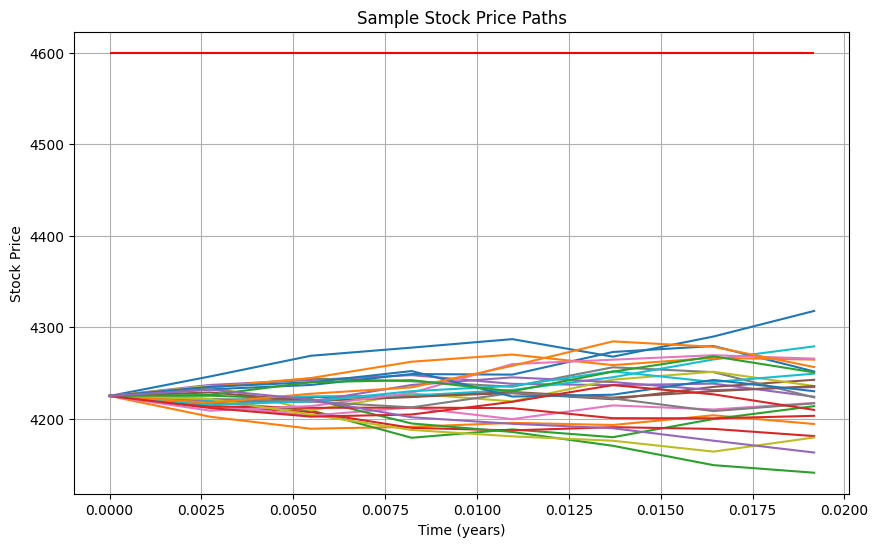

375.11111268848225

In [30]:
row = eu_df.iloc[658767]
monte_carlo_european_option_pricing(
    row["Close/Last"],
    row["strike_price"] / 1000,
    row["tte"].days / 365,
    row["FEDFUNDS"] / 100,
    row["volatility"],
    type_of_option= "Call" if row["cp_flag"] == "C" else "Put",
    plot=True
)

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style,tte,Close/Last,FEDFUNDS,volatility
3,2018-02-28,NDX 180615P7925000,2018-06-15,P,7925000,1019.80,1040.90,E,107 days,6854.42,1.42,0.038327
4,2019-06-19,NDX 190920P7625000,2019-09-20,P,7625000,239.90,242.70,E,93 days,7667.74,2.38,0.022673
5,2018-05-21,NDXP 180601P5325000,2018-06-01,P,5325000,0.05,1.75,E,11 days,6905.53,1.70,0.029433
7,2018-11-30,NDXP 181219P6425000,2018-12-19,P,6425000,25.70,28.80,E,19 days,6949.01,2.20,0.064448
8,2016-02-24,NDX 170616P2550000,2017-06-16,P,2550000,52.80,62.00,E,478 days,4200.66,0.38,0.022706
9,2015-12-09,NDX 170616P3250000,2017-06-16,P,3250000,101.00,115.80,E,555 days,4622.14,0.24,0.039596
10,2018-03-09,NDX 180615P2300000,2018-06-15,P,2300000,0.00,1.75,E,98 days,7101.18,1.51,0.039919
12,2021-06-08,NDX 220318P9300000,2022-03-18,P,9300000,132.70,145.50,E,283 days,13810.86,0.08,0.033466
13,2020-04-20,NDXP 200504P5900000,2020-05-04,P,5900000,0.90,1.60,E,14 days,8726.51,0.05,0.113329
15,2017-12-13,NDX 191220P8000000,2019-12-20,P,8000000,1524.00,1546.00,E,737 days,6394.67,1.30,0.030457
